# Movie Data Analysis

Dataset: Information aboiut movies from 1980-2020 scrapped IMDB

Link: https://www.kaggle.com/datasets/danielgrijalvas/movies

Business Understanding/Goal: Learn about what makes movies popular!

## 1. Import Libraries

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Load Dataset

In [15]:
df = pd.read_csv("data/movies.csv")

## 3. Understand the Data

In [16]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


Columns that look useful:
* name, rating, genre, year, score, votes, director, star, country, budget, gross, company, runtime

From this, I could try to figure out:
* Which genre's have the best ratings
* Which directors have the best success in the box office
* How does the rating (pg, pg-13, etc) effect the success in the box office
* Does runtime effect viewers opinion on the movie

In [17]:
df.describe()

,year,score,votes,budget,gross,runtime
count,7668.000000,7665.000000,7.665000e+03,5.497000e+03,7.479000e+03,7664.000000
mean,2000.405451,6.390411,8.810850e+04,3.558988e+07,7.850054e+07,107.261613
std,11.153508,0.968842,1.633238e+05,4.145730e+07,1.657251e+08,18.581247
min,1980.000000,1.900000,7.000000e+00,3.000000e+03,3.090000e+02,55.000000
25%,1991.000000,5.800000,9.100000e+03,1.000000e+07,4.532056e+06,95.000000
50%,2000.000000,6.500000,3.300000e+04,2.050000e+07,2.020576e+07,104.000000
75%,2010.000000,7.100000,9.300000e+04,4.500000e+07,7.601669e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


## 4. Data Processing/Preparation

In [18]:
df.columns

Index(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross', 'company',
       'runtime'],
      dtype='object')

### 4.1. Dropping Unnecessary Columns

In [19]:
df = df[['name', 'rating', 'genre', 'year', 'score', 'votes',
       'director', 'star', 'country', 'budget', 'gross', 'company',
       'runtime']]

df.shape

(7668, 13)

In [20]:
df = df.rename(columns={"name": "Name",
                        "rating": "Rating",
                        "genre": "Genre",
                        "year": "Year",
                        "score": "Score",
                        "votes": "Votes",
                        "director": "Director",
                        "star": "Star",
                        "country": "Country",
                        "budget": "Budget",
                        "gross": "Gross",
                        "company": "Company",
                        "runtime": "Runtime"})

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      7668 non-null   object 
 1   Rating    7591 non-null   object 
 2   Genre     7668 non-null   object 
 3   Year      7668 non-null   int64  
 4   Score     7665 non-null   float64
 5   Votes     7665 non-null   float64
 6   Director  7668 non-null   object 
 7   Star      7667 non-null   object 
 8   Country   7665 non-null   object 
 9   Budget    5497 non-null   float64
 10  Gross     7479 non-null   float64
 11  Company   7651 non-null   object 
 12  Runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(7)
memory usage: 778.9+ KB


### 4.2. Checking for Duplicates

In [21]:
df.duplicated().sum()

df.loc[df.duplicated(["Name"], keep=False)].sort_values(["Name"])

,Name,Rating,Genre,Year,Score,Votes,Director,Star,Country,Budget,Gross,Company,Runtime
483,A Nightmare on Elm Street,R,Horror,1984,7.5,212000.0,Wes Craven,Heather Langenkamp,United States,1800000.0,2.550714e+07,New Line Cinema,91.0
5712,A Nightmare on Elm Street,R,Crime,2010,5.2,95000.0,Samuel Bayer,Jackie Earle Haley,United States,35000000.0,1.156952e+08,New Line Cinema,95.0
7556,After the Wedding,PG-13,Drama,2019,6.3,6700.0,Bart Freundlich,Julianne Moore,United States,NaN,2.790019e+06,Sony Pictures Classics,112.0
4995,After the Wedding,R,Drama,2006,7.7,33000.0,Susanne Bier,Mads Mikkelsen,Denmark,NaN,1.163272e+07,Zentropa Entertainments,120.0
7481,Aladdin,PG,Adventure,2019,6.9,239000.0,Guy Ritchie,Will Smith,United Kingdom,183000000.0,1.050694e+09,Walt Disney Pictures,128.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,Venom,R,Horror,1981,5.8,2600.0,Piers Haggard,Klaus Kinski,United Kingdom,NaN,5.229643e+06,Morison Film Group,92.0
3708,Where the Heart Is,PG-13,Comedy,2000,6.7,32000.0,Matt Williams,Natalie Portman,United States,15000000.0,4.086372e+07,Twentieth Century Fox,120.0
1812,Where the Heart Is,R,Comedy,1990,6.0,1500.0,John Boorman,Dabney Coleman,United States,15000000.0,1.106475e+06,Touchstone Pictures,107.0
836,Wuthering Heights,Not Rated,Drama,1985,6.5,339.0,Jacques Rivette,Fabienne Babe,France,NaN,NaN,La Cecilia,130.0


Looks like the duplicates are mainly due to remakes/re-dos, so I will keep them because only the name stays the same.

### 4.3. Checking for Null Values

In [23]:
df.isna().sum() / df.shape[0]

Name        0.000000
Rating      0.010042
Genre       0.000000
Year        0.000000
Score       0.000391
Votes       0.000391
Director    0.000000
Star        0.000130
Country     0.000391
Budget      0.283125
Gross       0.024648
Company     0.002217
Runtime     0.000522
dtype: float64

## 5. Univariate Data Analysis

<Axes: xlabel='Year', ylabel='Count'>

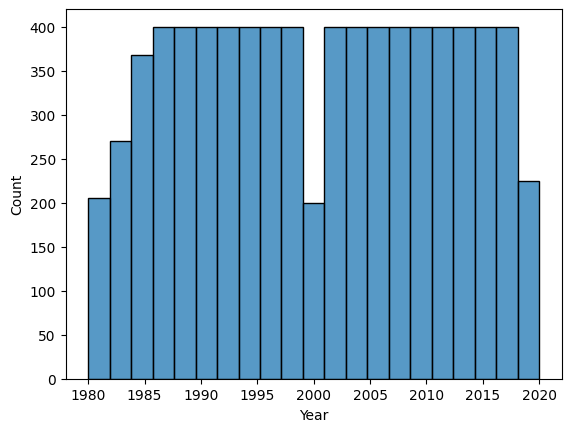

In [25]:
# Year released
sns.histplot(data=df, x="Year")

<Axes: xlabel='Genre', ylabel='Count'>

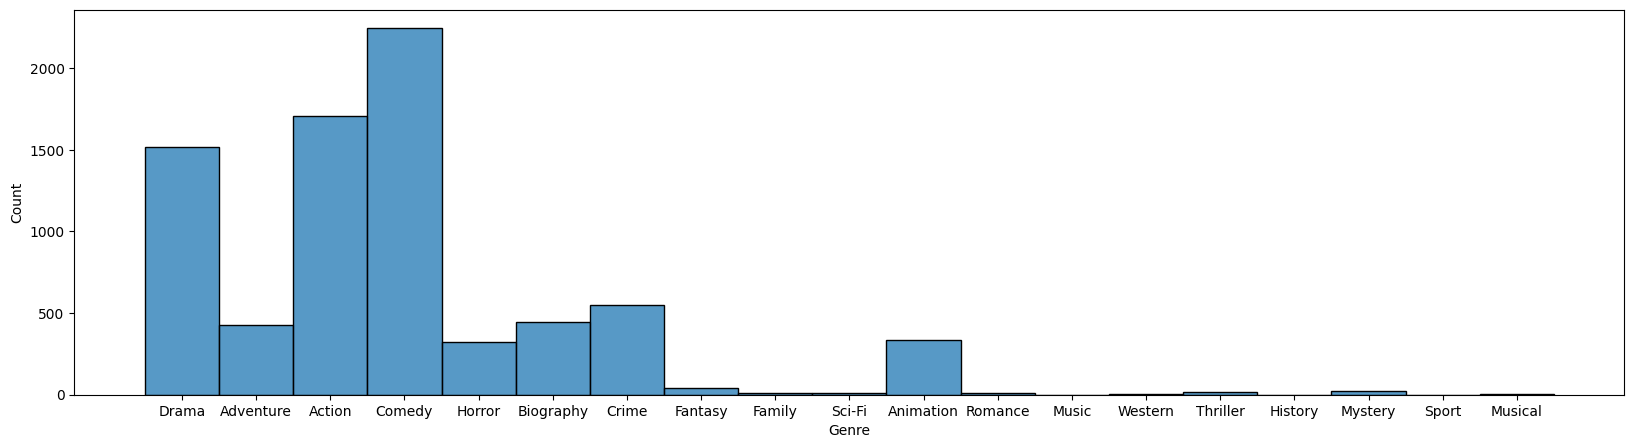

In [29]:
# Amount of Genres
plt.figure(figsize=(20,5))
sns.histplot(data=df, x="Genre")

104.0 107.2616127348643 366.0


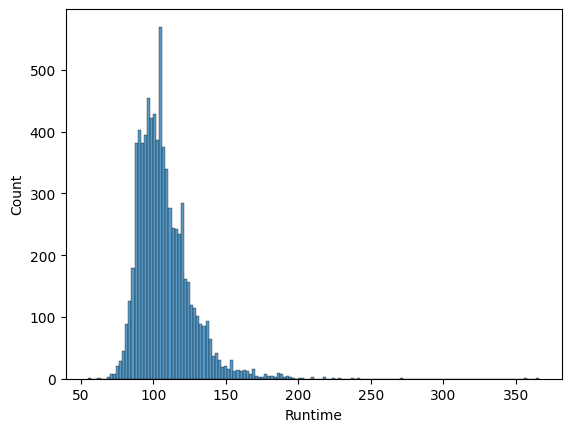

In [45]:
# Runtime
sns.histplot(data=df, x="Runtime")
print(df["Runtime"].median(), df["Runtime"].mean(), df["Runtime"].max())
# df.loc[df["Runtime"] == df["Runtime"].max()]


Looks like the average runtime is 107 minutes maximum of 366 minutes and the overall distrubution is skewed right. Both the median (104) and mean (107) are very close, so either is an accurate estimate for the center.

## 6. Multivarate Data Analysis

### Score and Runtime

<Axes: title={'center': 'Score vs Runtime'}, xlabel='Runtime', ylabel='Score'>

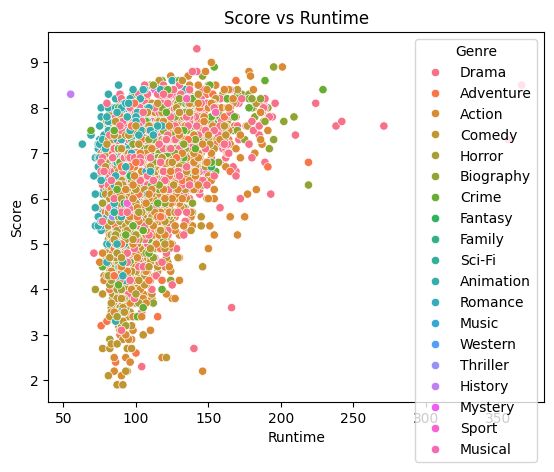

In [72]:
plt.title("Score vs Runtime")

sns.scatterplot(data=df, x="Runtime", y="Score", hue="Genre")

### Directors and their movie statistics

In [107]:
directors = df.groupby('Director')[["Score", "Gross", "Runtime"]].mean()

directors["Gross"].max()
directors.loc[directors["Gross"] == directors["Gross"].max()]


,Score,Gross,Runtime
Director,,,
Anthony Russo,7.58,1.368850e+09,144.6


# Statistical Analysis

## Which genre's have the best ratings?

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, 'Drama'),
  Text(1, 0, 'Adventure'),
  Text(2, 0, 'Action'),
  Text(3, 0, 'Comedy'),
  Text(4, 0, 'Horror'),
  Text(5, 0, 'Biography'),
  Text(6, 0, 'Crime'),
  Text(7, 0, 'Fantasy'),
  Text(8, 0, 'Family'),
  Text(9, 0, 'Sci-Fi'),
  Text(10, 0, 'Animation'),
  Text(11, 0, 'Romance'),
  Text(12, 0, 'Music'),
  Text(13, 0, 'Western'),
  Text(14, 0, 'Thriller'),
  Text(15, 0, 'History'),
  Text(16, 0, 'Mystery'),
  Text(17, 0, 'Sport'),
  Text(18, 0, 'Musical')])

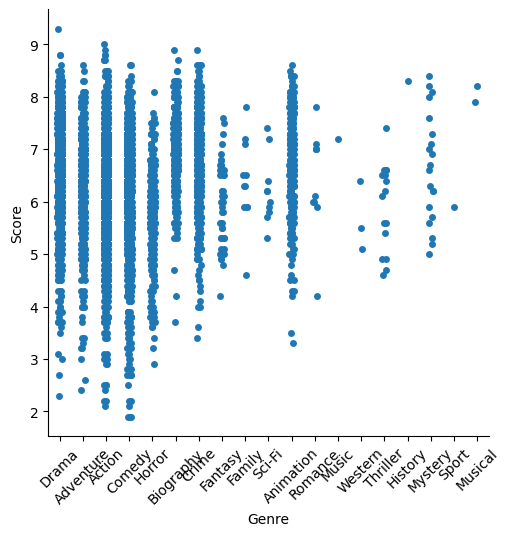

In [76]:
# Graph for context on how many votes 
sns.catplot(data=df, x="Genre", y="Score")
plt.xticks(rotation=45)

In [77]:
df.groupby('Genre')[["Score"]].mean()

,Score
Genre,
Action,6.202817
Adventure,6.291569
Animation,6.769231
Biography,7.030926
Comedy,6.193987
Crime,6.671506
Drama,6.693668
Family,6.363636
Fantasy,6.006818


Although Musical, Music, and History are techincally the highest average scored, they also have very few data points when looking at the scatter plot. By looking at the data, it seems the highest average score with enough votes would be biography.

## Which directors have the best success in the box office?

In [83]:
directors = df.groupby('Director')[["Score", "Gross", "Runtime"]].mean().sort_values(["Gross"], ascending=False)

directors


,Score,Gross,Runtime
Director,,,
Anthony Russo,7.580000,1.368850e+09,144.600000
Kyle Balda,6.350000,1.097122e+09,90.000000
Josh Cooley,7.700000,1.073395e+09,100.000000
Chris Buck,7.166667,1.059909e+09,97.666667
Lee Unkrich,8.300000,9.373943e+08,104.000000
...,...,...,...
William Fruet,5.100000,NaN,91.000000
William Webb,4.900000,NaN,91.000000
Wing-Cho Yip,6.700000,NaN,89.000000


Looking at the list of directors, the director with the best average success in the box office is Anthony Russo, and second was Kyle Balda. Both make sense as Anthony Russo filmed some of the Avengers movies with his brother, and they did extremely well. And Kyle Balda is a BAFTA nominated director for his animatated films, like the hit Despicle Me franchise at illumination. Overall, these directors seem to have done the best due to their work at the huge companies in their industries (super hero and animation).

## What is the best scored runtime range?

In [102]:
df['Runtime_Group'] = pd.cut(x=df['Runtime'], bins=[0, 60, 90, 120, 150, 400], 
                     labels=['Less or equal to an Hour', 'Betwwen an Hour and Hour and a Half', 'Between Hour and a Half and Two Hours', 
                             'Between Two Hours and Two and a Half hours', 'Three hours or More']) 

df["Runtime_Group"].value_counts()

Runtime_Group
Between Hour and a Half and Two Hours         5129
Between Two Hours and Two and a Half hours    1213
Betwwen an Hour and Hour and a Half           1114
Three hours or More                            207
Less or equal to an Hour                         1
Name: count, dtype: int64

Since there is only one movie in this data less than or equal to one movie, I will not be counting it in terms of average score. And Three hours or more also has significantly less amount of movies than the rest of the runtimes, so that one also comes with more hesitancy.

In [103]:
rt_group = df.groupby("Runtime_Group")[['Score']].mean()

rt_group


/var/folders/4d/pc8qw28n64g8q0bp8wxl8g5h0000gn/T/ipykernel_72909/3180310960.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rt_group = df.groupby("Runtime_Group")[['Score']].mean()


,Score
Runtime_Group,
Less or equal to an Hour,8.300000
Betwwen an Hour and Hour and a Half,5.900270
Between Hour and a Half and Two Hours,6.316400
Between Two Hours and Two and a Half hours,6.959571
Three hours or More,7.532850


Discounting the Less or equal to an hour, the highest scored should be three hours or more, but then again, that category had significantly less movies than the rest. From the variation of amount of mvoies in each category, it is hard to determine, but I am inclined to say that between two hours and two and a half hours is the highest scored runtime range in this data.